<a href="https://colab.research.google.com/github/fatenchtioui/NLP/blob/main/NPL_TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# POS Tagging en utilisant MMH et de l'heuristique Viterbi
## Exploration de Treebank Tagged Corpus

In [ ]:
# import Labraies
import nltk,re, pprint
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

## 1.Exploration de Treebank Tagged Corpus

In [ ]:
# lecture de phrases étiquetée Treebank
# télecharger les données Treebank si elles ne sont pas déja présente
nltk.download('treebank')
# obtenir la liste des phrases étiquetées à partir du corpus Treebank
wsj = list(nltk.corpus.treebank.tagged_sents())

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [ ]:
# premiére phrases étiquetée
print(wsj[1])

[('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')]


# Segmenter le corpus annoté en base de train et base de test

In [ ]:
# division en ensembles d'entrainement et de test
"""si tu éxecutes ce code plusieurs fois la division du corpus en snsemble de teste et d'entrainnement et de test sera toujour la meme car le génerateur de nombre """
random.seed(123)
# divise le corpus en ensemble d'entrainement et de test
train_set, test_set = train_test_split(wsj, test_size=0.3)
 # affiche la yaille de l'ensemble d'entrainement
print(len(train_set))
print(len(test_set))

2739
1175


In [ ]:
#obtentionde la liste des étiquetées
# cree une liste de mote étiquetés à patir de l'ensemble d'entrainement
train_tagged_words=[]
# parcourt chaque phrase dans l'ensemble d'entrainement
for sent in train_set:
  # parcourt chaque paire(mot, étiquette) dans la phrases
  for tup in sent:
    #ajoute la paire à la liste train_tagged_words
    train_tagged_words.append(tup)
#affiche la longureur de la liste des mots étiquetés
len(train_tagged_words)

70040

In [ ]:
# tokens
tokens=[]
for pair in train_tagged_words:
  tokens.append(pair[0])

tokens[:10]

['Weisfield',
 "'s",
 'surged',
 '6',
 '3\\/4',
 'to',
 '55',
 '1\\/2',
 'and',
 'Ratners']

## création du vocabulaire à partir de la liste de tokens

In [ ]:
# vocabulaire
v= set(tokens)
print(len(v))
v

10208


{'80.8',
 'outright',
 'Kobe',
 'arrangements',
 'block',
 'Landor',
 'eat',
 'summary',
 'exporter',
 'pulp',
 'Aug.',
 'spin-off',
 'theological',
 '*ICH*-2',
 'Al',
 'struggling',
 'Fulham',
 '*T*-8',
 'tone',
 'Brazil',
 'commission',
 'renew',
 'portion',
 'section',
 'Guber\\/Peters',
 '*T*-120',
 'nice',
 'them',
 'matching',
 'stepped',
 'seek',
 'Southern',
 'Ruth',
 'officers',
 'weekly',
 'Owner',
 'teachers',
 'pointed',
 'answers',
 'graphs',
 '96.4',
 'trades',
 'forest-product',
 'by',
 'broadcasting',
 'task',
 'corkscrews',
 'slowing',
 'amended',
 'Unless',
 'three-lawyer',
 'microprocessors',
 'cardiovascular',
 'resume',
 'policies',
 'government',
 'lessen',
 '3,500',
 'On',
 'Napolitan',
 'employee',
 'elaborate',
 'pursuant',
 'posted',
 'ventures',
 'CHANGED',
 'buyers',
 'fringe',
 'desktop',
 '105',
 '115',
 '12',
 'Rabia',
 'barge',
 '*-114',
 'adult',
 'Allen',
 'scandal',
 'Nicaraguan',
 'forthcoming',
 'respondents',
 'complain',
 'skidded',
 'plastic',
 '

## Tags uniques dans l'ensemble d'entrainement

In [ ]:
#nomvbre des tags
T= set()
for pair in train_tagged_words:
  T.add(pair[1])

len(T)

46

In [ ]:
print(T)

{'UH', 'IN', 'RBR', 'SYM', 'POS', 'NNP', 'VBN', 'VBP', 'RP', '#', '.', '-RRB-', 'JJR', 'CC', 'WP', 'PRP$', ',', 'RB', 'WDT', 'LS', 'NNS', 'MD', 'VBD', 'CD', 'FW', 'JJS', '``', 'DT', ':', 'NNPS', 'VBZ', 'EX', 'TO', 'VBG', "''", 'VB', '$', '-NONE-', 'WRB', '-LRB-', 'JJ', 'WP$', 'PRP', 'RBS', 'NN', 'PDT'}


## algorithme d'étiquetage HMM
l'algorithme base sur modele de Markvo cache est utilise pour marque les mots consiste à attribut la balise la plus probable au mot

In [ ]:
# calcul de P(W/t) et stokage dans matrice T * V
t = len(T)
V= len(v)
w_given_t= np.zeros((t, V)) # initialisation de la matrice

In [ ]:
# calcule de P(w/t) : probabilité d'émission
def word_given_tag(word, tag, train_bag= train_tagged_words):
  #creé une liste de paires (mot, tag) pour le tag donné
  tag_list = []
  for pair in train_bag:
    if pair[1] == tag:
      tag.append(pair)

  count_tag = len(tag_list)
  w_given_tag_list = []
  for pair in tag_list:
    if pair[0] == word:
      w_given_tag_list = len(w_given_tag_list)
  count_w_given_tag = len(w_given_tag_list)
  return(count_w_given_tag, count_tag)


## Probabilité de transition

In [ ]:
# calcul de p(t2/ t1): Probabilité de transition
def t2_given_t1(t2, t1, train_bag=train_tagged_words):
  # liste des tags dans l'ensemble d'entrainement
  tags=[]
  for pair in train_bag:
    tags.append(pair[1])
  #compte le nombre d'occurences du tag t1 dans l'ensemble d'entrainement
  count_t1=0
  count_t1=tags.count(t1)
  #initialisation du compteur pour p(t2-t1)
  count_t2_t1 = 0
  # boucle à travers les indice des rags dans l'ensemble d'entrainement
  for index in range(len(tags) -1):
    if tags[index]==t1 and tags[index +1] ==t2:
       count_t2_t1 +=1
  return(count_t2_t1, count_t1)



In [ ]:
#creation d'une matirce de transition t*t des tags
# chaque colunne est t2 chaque ligne est t1
# ainis, M(i, j) represente P(tj donné ti)
tags_matrix= np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
  for j , t2 in enumerate(list(T)): # count_t2_t1/count_t1
    tags_matrix[i,j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2,  t1)[1]

In [ ]:
tags_matrix

array([[0.        , 0.33333334, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01767045, 0.00058901, ..., 0.        , 0.11014578,
        0.00103078],
       [0.        , 0.26436782, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.07692308, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.2452394 , 0.00055036, ..., 0.        , 0.12372041,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
#convertir matrix à dataframe
tags_df =pd.DataFrame(tags_matrix, columns = list(T), index= list(T))

In [ ]:
tags_df

,UH,IN,RBR,SYM,POS,NNP,VBN,VBP,RP,#,...,$,-NONE-,WRB,-LRB-,JJ,WP$,PRP,RBS,NN,PDT
UH,0.000000,0.333333,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
IN,0.000000,0.017670,0.000589,0.00000,0.000000,0.150199,0.003534,0.000147,0.000000,0.000884,...,0.027242,0.034752,0.000884,0.000000,0.098365,0.000147,0.032396,0.000000,0.110146,0.001031
RBR,0.000000,0.264368,0.000000,0.00000,0.000000,0.000000,0.034483,0.011494,0.000000,0.000000,...,0.000000,0.022989,0.011494,0.011494,0.390805,0.000000,0.000000,0.000000,0.000000,0.000000
SYM,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
POS,0.000000,0.000000,0.000000,0.00000,0.000000,0.133779,0.013378,0.000000,0.000000,0.000000,...,0.003344,0.000000,0.000000,0.000000,0.207358,0.000000,0.000000,0.003344,0.401338,0.000000
NNP,0.000000,0.043622,0.000000,0.00015,0.051267,0.382851,0.000750,0.003598,0.000150,0.000000,...,0.000300,0.005247,0.000300,0.002848,0.009594,0.000000,0.000600,0.000000,0.054565,0.000000
VBN,0.000000,0.080863,0.001348,0.00000,0.000000,0.010782,0.023585,0.000000,0.009434,0.000000,...,0.004717,0.557952,0.000000,0.000000,0.043801,0.000000,0.003369,0.000674,0.064016,0.000000
VBP,0.000000,0.087420,0.004264,0.00000,0.000000,0.021322,0.166311,0.000000,0.013859,0.000000,...,0.002132,0.147122,0.001066,0.001066,0.076759,0.000000,0.021322,0.000000,0.024520,0.001066
RP,0.000000,0.209790,0.000000,0.00000,0.000000,0.020979,0.000000,0.000000,0.000000,0.000000,...,0.006993,0.118881,0.000000,0.000000,0.062937,0.000000,0.000000,0.000000,0.048951,0.000000
#,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# selection tout les valeurs associees à l'etiquette
tags_df.loc['.',:]

UH        0.000369
IN        0.122050
RBR       0.001106
SYM       0.000000
POS       0.000000
NNP       0.178835
VBN       0.001844
VBP       0.000000
RP        0.000000
#         0.000000
.         0.000000
-RRB-     0.005531
JJR       0.002950
CC        0.047935
WP        0.004056
PRP$      0.006637
,         0.000000
RB        0.036873
WDT       0.000737
LS        0.001106
NNS       0.041667
MD        0.000369
VBD       0.000737
CD        0.006268
FW        0.000000
JJS       0.001844
``        0.073009
DT        0.214970
:         0.002950
NNPS      0.002950
VBZ       0.001475
EX        0.004425
TO        0.001844
VBG       0.002581
''        0.061947
VB        0.000369
$         0.000737
-NONE-    0.018437
-LRB-     0.003687
WRB       0.005531
JJ        0.036873
WP$       0.000000
PRP       0.060841
RBS       0.000737
NN        0.044617
PDT       0.000737
Name: ., dtype: float32

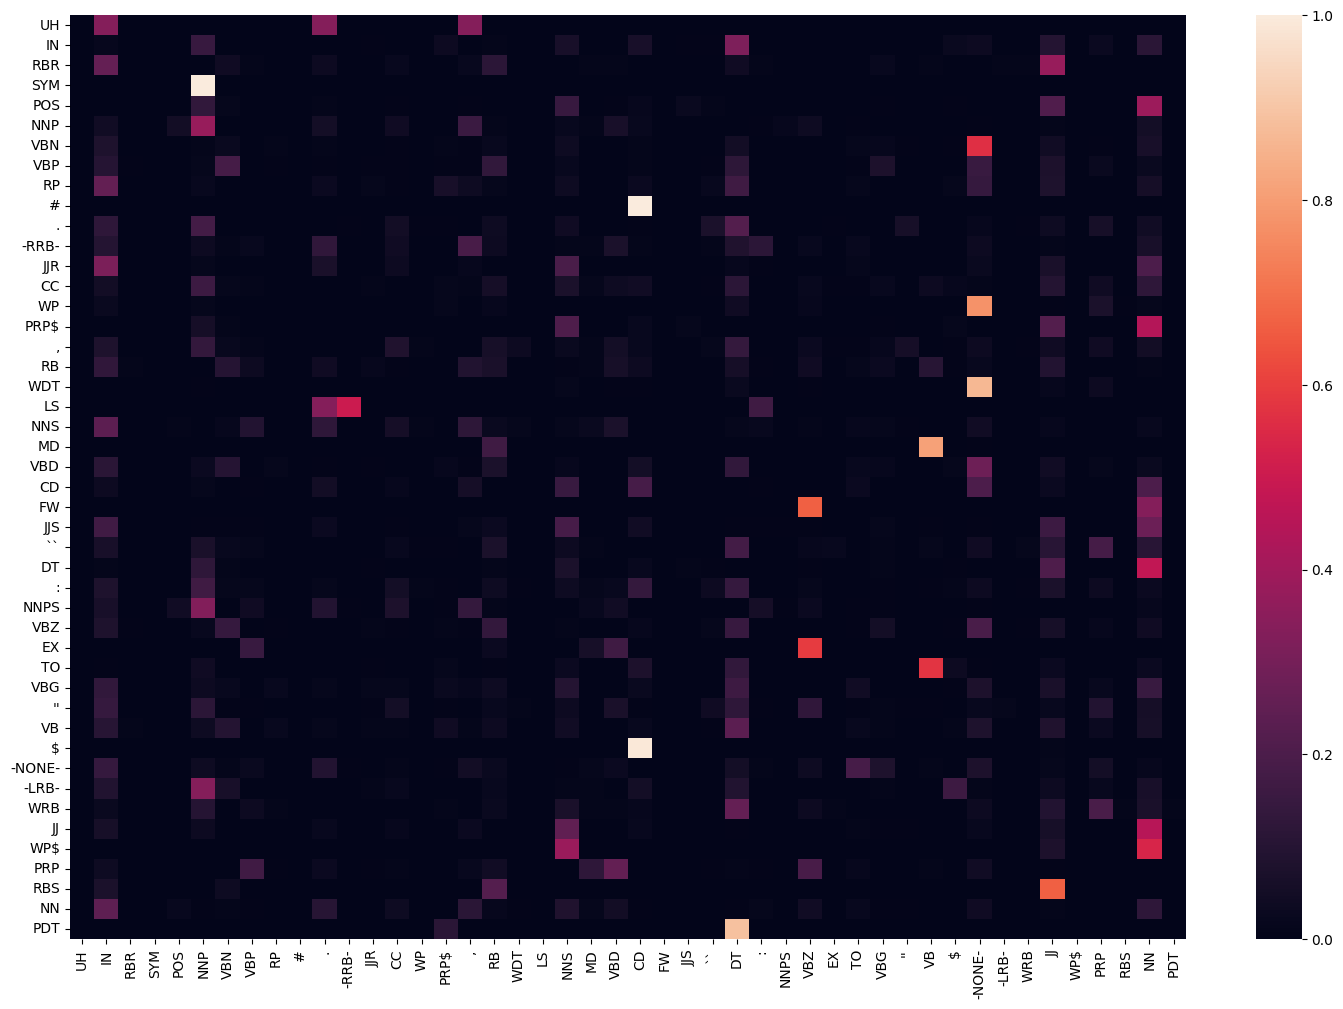

In [ ]:
# Heatmap de la matrix de tag
# T(ij) represente p(tag j donnée tag i)
plt.figure(figsize=(18, 12))
sns.heatmap(tags_df)
plt.show()

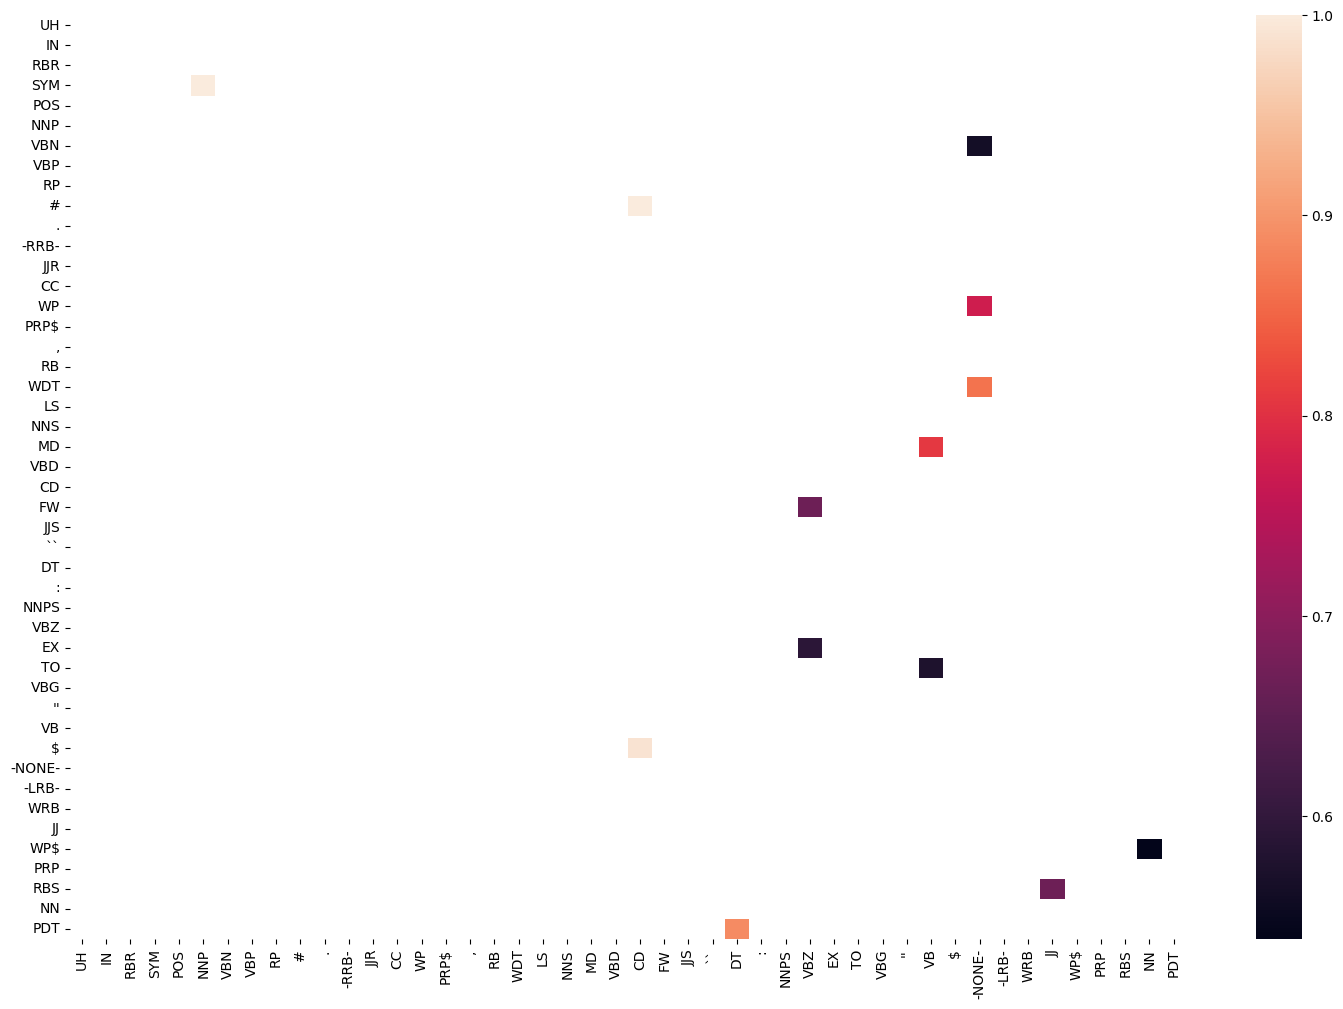

In [ ]:
# Tags fréquents: filtre la matice pour P(t2, t1)>0.5
tags_frequent = tags_df[tags_df>0.5]
# Heatmap des tags fréquence
plt.figure(figsize=(18, 12))
sns.heatmap(tags_frequent)
plt.show()

## Algorithme Viterbi

l'agorithme de decodage utilise dans les modelle HMM pour trove la sequence la plus probable d'etat cache etant donne une sequence  d'observation



In [ ]:
# e nombre totale de paires (mot, étiquette) dans l'ensemble d'entrainement
len(train_tagged_words)

70040

In [ ]:
# algorithme viterbi
def Viterbi(words, train_bag= train_tagged_words):
  state=[]
  # listre T content tous les tagsd unique dans l'ensemblez d'entrainement
  T = list(set([pair[1] for pair in train_bag]))
  for key, word in enumerate(words):
    p=[]
    #1 ere sur tous les tags possible
    for tag in T:
      if key == 0:
        # probabilité de transition pour le premier mot: P(tag/start)= P(tag|'.')
        #tags_df = la matrice de transition T*T
        transition_p = tags_df.loc['.', tag]
      else:
        #probabilité de transition pour les mots suivante
        # utilisela probabilite de transition depuis le dernier etat prédit(state[-1])
        transition_p = tags_df.loc[state[-1], tag]

      #word_given_tag retourn p(w/t) probabilité d'émission
      emission_p = word_given_tag(words[key], tag)[0] /word_given_tag(words[key], tag)[1]
    state_probability = emission_p * transition_p
    p.append(state_probability)
      # obtient la probability maximale te l'état associe et l'ajouter à la liste state
    pmax = max(p)
    state_max = T[p.index(pmax)]
    state.append(state_max)
  return list(zip(words, state))


## Evaluation sur la base de test

In [ ]:
random.seed(1234)
# choix de 5 phrase aléatoire
rndom=[]
for _ in range(5):
  rndom.append(random.randint(1, len(test_set)))
# liste des phrases
test_run = []
for i in rndom:
  test_run.append(test_set[i])
  # des motes étiquetes
test_run_base = []
for sent in test_run:
    for tup in sent:
      test_run_base.append(tup)
      # liste des mots non étiquetes
test_tagged_words=[]
for sent in test_run:
    for tup in sent:
      test_tagged_words.append(tup[0])

test_run





[[('60', 'CD'),
  ('million', 'CD'),
  ('Swiss', 'JJ'),
  ('francs', 'NNS'),
  ('of', 'IN'),
  ('privately', 'RB'),
  ('placed', 'VBN'),
  ('convertible', 'JJ'),
  ('notes', 'NNS'),
  ('due', 'JJ'),
  ('Dec.', 'NNP'),
  ('31', 'CD'),
  (',', ','),
  ('1993', 'CD'),
  (',', ','),
  ('with', 'IN'),
  ('a', 'DT'),
  ('fixed', 'VBN'),
  ('0.25', 'CD'),
  ('%', 'NN'),
  ('coupon', 'NN'),
  ('at', 'IN'),
  ('par', 'NN'),
  ('via', 'IN'),
  ('Union', 'NNP'),
  ('Bank', 'NNP'),
  ('of', 'IN'),
  ('Switzerland', 'NNP'),
  ('.', '.')],
 [('Life', 'NNP'),
  ('of', 'IN'),
  ('Georgia', 'NNP'),
  ('is', 'VBZ'),
  ('part', 'NN'),
  ('of', 'IN'),
  ('the', 'DT'),
  ('Nationale', 'NNP'),
  ('Nederlanden', 'NNP'),
  ('Group', 'NNP'),
  (',', ','),
  ('based', 'VBN'),
  ('*', '-NONE-'),
  ('in', 'IN'),
  ('the', 'DT'),
  ('Netherlands', 'NNP'),
  ('.', '.')],
 [('The', 'DT'),
  ('benchmark', 'NN'),
  ('30-year', 'JJ'),
  ('bond', 'NN'),
  ('about', 'IN'),
  ('1\\/4', 'CD'),
  ('point', 'NN'),
  (',', ',

In [ ]:
# tagging the test sentences
start= time.time()
tagged_seq = Viterbi(test_tagged_words)
end = time.time()
difference = end-start

AttributeError: ignored